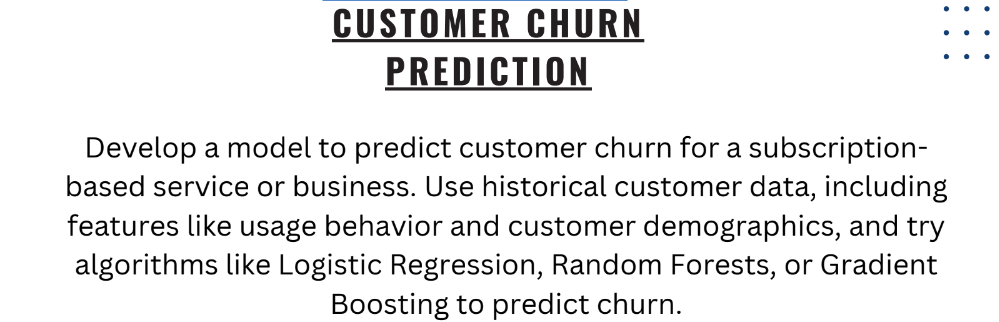

In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [5]:
URL = "Churn_Modelling.csv"
data = pd.read_csv(URL)
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
x = data.iloc[:, 3:-1].values
y = data.iloc[:, -1].values

In [7]:
#encode gender
from sklearn.preprocessing import LabelEncoder
GenderEncoder = LabelEncoder()
x[:, 2] = GenderEncoder.fit_transform(x[:, 2])
print(x)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


In [8]:
#one hot encoding for geography
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
columntrans = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
x = np.array(columntrans.fit_transform(x))
print(x)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [11]:
#use Random forest classifier
from sklearn.ensemble import RandomForestClassifier
regressor_model = RandomForestClassifier(n_estimators = 10, random_state = 0)
regressor_model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [12]:
from sklearn.metrics import accuracy_score

prediction = regressor_model.predict(x_train)
accuracy = accuracy_score(y_train, prediction)
print("Accuracy on training data:",accuracy)

Accuracy on training data: 0.9856


In [13]:
predictions = regressor_model.predict(x_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy on test data:",accuracy)

Accuracy on test data: 0.862
